<a href="https://colab.research.google.com/github/michelepignatari/Machine_Learning/blob/master/KNN_x_ArvoreDecisao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objetivo:** avaliar qual o melhor modelo de classificação para predizer a classificação de uma planta do tipo Iris, de acordo com o tamanho de suas sépalas e pétalas.
Os modelos testados são KNN para o qual decidi-se a classificação de acordo com a proximidade com os vizinhos e o Árvore de Decisão.

In [9]:
#Importar Bibliotecas
import pylab as pl #utilizado para plotar gráficos
import pandas as pd #utilizado para obter o dataFrame
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #função que realiza a divisão do dataset
from sklearn import neighbors, datasets
from sklearn.preprocessing import StandardScaler #utilizado para normalização dos dados
from mlxtend.plotting import plot_confusion_matrix #utilizado para plotagem da matriz de confusão
from sklearn.metrics import classification_report, confusion_matrix #utilizado para comparar os modelos de treino e teste
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

# Para o modelo KNN
from sklearn.neighbors import KNeighborsClassifier #utilizado para o modelo preditivo KNN

#Para o modelo Árvore de Decisão
from sklearn.tree import DecisionTreeClassifier #classificador da árvore de decisão
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

# Para otimização dos hiperparâmetros dos modelos
from sklearn.model_selection import GridSearchCV

# Para validação cruzada
from sklearn.model_selection import cross_val_score


In [10]:
iris = datasets.load_iris()

In [11]:
#Converter o Banco de Dados iris para o DataFrame
df_iris = pd.DataFrame(data=np.c_[iris['data'],iris['target']], #features são os atributos que definem as classificações da planta
                       columns=iris['feature_names']+['target']) #target é a classe a qual a planta pertence
print(df_iris.head())
df_iris.info

   sepal length (cm)  sepal width (cm)  ...  petal width (cm)  target
0                5.1               3.5  ...               0.2     0.0
1                4.9               3.0  ...               0.2     0.0
2                4.7               3.2  ...               0.2     0.0
3                4.6               3.1  ...               0.2     0.0
4                5.0               3.6  ...               0.2     0.0

[5 rows x 5 columns]


<bound method DataFrame.info of      sepal length (cm)  sepal width (cm)  ...  petal width (cm)  target
0                  5.1               3.5  ...               0.2     0.0
1                  4.9               3.0  ...               0.2     0.0
2                  4.7               3.2  ...               0.2     0.0
3                  4.6               3.1  ...               0.2     0.0
4                  5.0               3.6  ...               0.2     0.0
..                 ...               ...  ...               ...     ...
145                6.7               3.0  ...               2.3     2.0
146                6.3               2.5  ...               1.9     2.0
147                6.5               3.0  ...               2.0     2.0
148                6.2               3.4  ...               2.3     2.0
149                5.9               3.0  ...               1.8     2.0

[150 rows x 5 columns]>

In [12]:
#Transformar os Dados em Array
x = df_iris.iloc[:,:-1].values #dados de entrada
y = df_iris.iloc[:, 4].values #última coluna, que corresponde à classe da planta

In [13]:
#Realizar a divisão dos dados entre treinamento e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.20)

**Utilização do algoritmo KNN**

In [14]:
#Normalizar os dados, utilizando funções de pré-processamento
scaler = StandardScaler() #Standardize features by removing the mean and scaling to unit variance
scaler.fit(x_treino) #fit: Compute the mean and std to be used for later scaling.

x_treino = scaler.transform(x_treino) #Transform: Perform standardization by centering and scaling
x_teste = scaler.transform(x_teste)

In [15]:
#Treinar o modelo
classificador = KNeighborsClassifier(n_neighbors=5)
classificador.fit(x_treino, y_treino)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [16]:
#Prever o resultado
y_previsao = classificador.predict(x_teste)

In [17]:
#Contruir a matriz de confusão para comparar o modelo criado
print(confusion_matrix(y_teste, y_previsao)) #Compute confusion matrix to evaluate the accuracy of a classification.
print(classification_report(y_teste, y_previsao)) #Build a text report showing the main classification metrics

[[10  0  0]
 [ 0 11  0]
 [ 0  1  8]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       0.92      1.00      0.96        11
         2.0       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



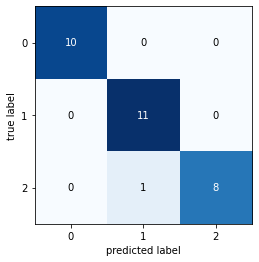

In [18]:
#Plotar a Matriz de Confusão em um gráfico
matriz_confusao = confusion_matrix(y_teste, y_previsao)
fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()

In [19]:
#Metrificar o KNN
knn_acuracia = round(accuracy_score(y_teste, y_previsao),6) #Acurácia: proporção de classificações corretas pelo total de classificações do domínio
knn_precisao = round(precision_score(y_teste, y_previsao, average ='weighted' ),6) #Quantos dos meus resultados positivos são realmente positivos
knn_recall = round(recall_score(y_teste, y_previsao, average='weighted'),6) #Quanto dos meus resultados positivos em testes foram encontrados pelo modelo
knn_fscore = round(f1_score(y_teste, y_previsao, average='weighted'),6) #Média harmônica entre a precisão e o recall ==> 2 *(precisão*recall) / (precisão + recall)

In [34]:
#Otimizando o KNN
parametros = {'n_neighbors':[1,20]}
knn_hps = GridSearchCV(classificador, parametros)
knn_hps.fit(x,y)
knn_hps.best_params_['n_neighbors']
print(knn_hps.best_params_['n_neighbors'])

classificadorOtimizado = KNeighborsClassifier(n_neighbors=3)
parAlgo = {'algorithm':('brute','ball_tree','auto','kd_tree'),'n_neighbors':[1,20]}
knn_hps2 = GridSearchCV(classificadorOtimizado, parAlgo)
knn_hps2.fit(x,y)
knn_hps2.best_params_['algorithm']
print(knn_hps2.best_params_['algorithm'])
print(knn_hps2.best_params_['n_neighbors'])

1
brute
1


In [35]:
#Validação Cruzada
val_cruz_knn = cross_val_score(classificador,x,y)
print (format(val_cruz_knn))

soma_val_cruz_knn = 0
for val_cruz_score in val_cruz_knn:
  soma_val_cruz_knn += val_cruz_score

print ("\nResultado Validação Cruzada KNN: {0}".format(soma_val_cruz_knn/5))

[0.96666667 1.         0.93333333 0.96666667 1.        ]

Resultado Validação Cruzada KNN: 0.9733333333333334


**Utilização do Algoritmo Árvore de Decisão**

In [22]:
#Criar o objeto de Classificação
clf = DecisionTreeClassifier()

#Realizar o Treinamento do Classificador
clf = clf.fit(x_treino, y_treino)

#Realizar a Previsão da Classificação
y_previsao = clf.predict(x_teste)

In [23]:
print(classification_report(y_teste, y_previsao)) #Build a text report showing the main classification metrics

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       0.85      1.00      0.92        11
         2.0       1.00      0.78      0.88         9

    accuracy                           0.93        30
   macro avg       0.95      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



<function matplotlib.pyplot.show>

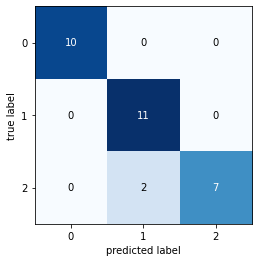

In [24]:
#Realizar a análise do modelo
matriz_confusao = confusion_matrix(y_teste,y_previsao)
from mlxtend.plotting import plot_confusion_matrix

fig, aux = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show

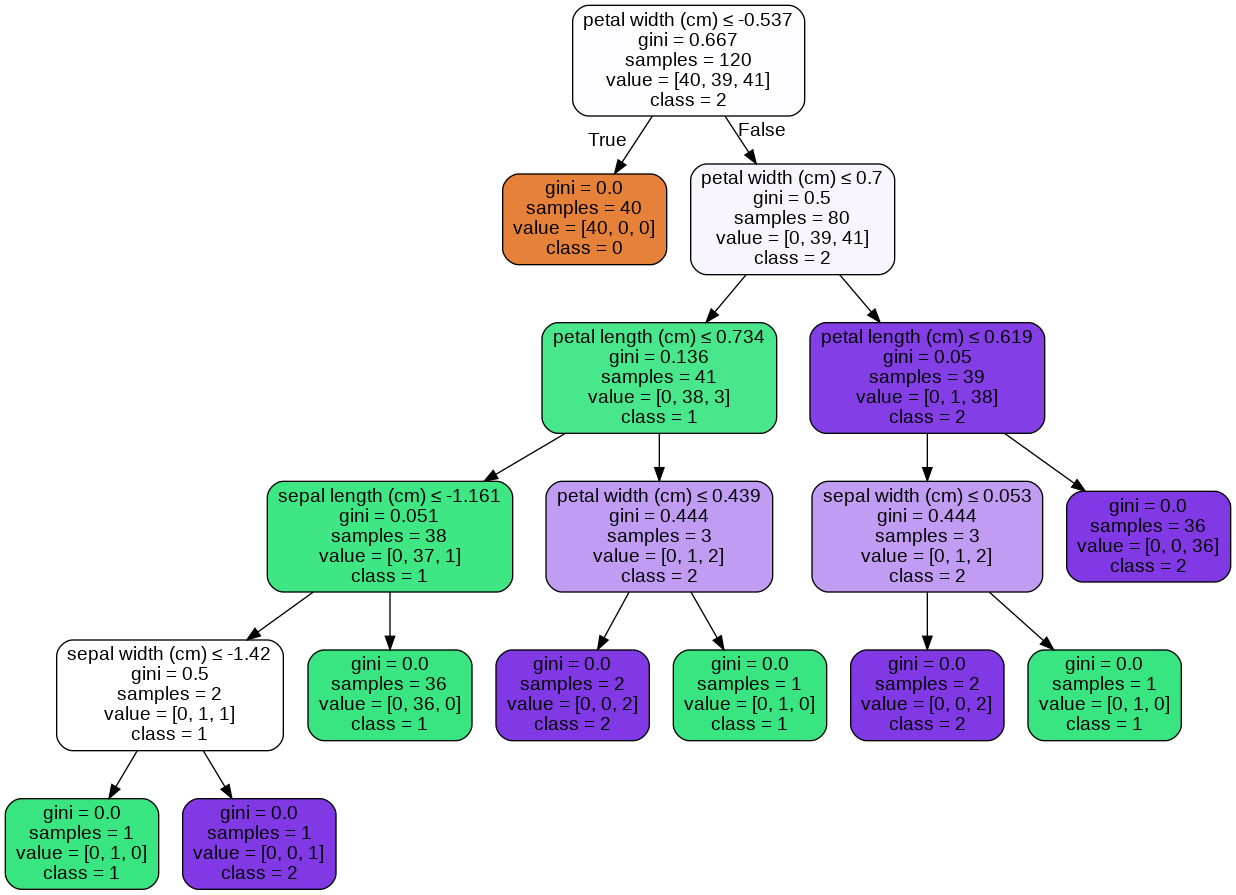

In [25]:
#Visualizar a árvore de decisão
dot_data = StringIO()
export_graphviz (clf,out_file=dot_data, filled=True, rounded=True,special_characters=True, feature_names=iris.feature_names, class_names=['0','1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png ('iris.png')
Image(graph.create_png())

In [26]:
#Metrificar a Arvore de Decisão
arv_acuracia = round(accuracy_score(y_teste, y_previsao),6) #Acurácia: proporção de classificações corretas pelo total de classificações do domínio
arv_precisao = round(precision_score(y_teste, y_previsao, average ='weighted'),6) #Quantos dos meus resultados positivos são realmente positivos
arv_recall = round(recall_score(y_teste, y_previsao, average='weighted'),6) #Quanto dos meus resultados positivos em testes foram encontrados pelo modelo
arv_fscore = round(f1_score(y_teste, y_previsao, average='weighted'),6) #Média harmônica entre a precisão e o recall ==> 2 *(precisão*recall) / (precisão + recall)

In [27]:
#Comparar os modelos:
print("KNN x Arvore Decisao \n")
print("Classes: {0}\n".format(iris.target_names))
print("Acurácia: {0} vs {1}".format(knn_acuracia, arv_acuracia))
print("Precisão: {0} vs {1}".format(knn_precisao, arv_precisao))
print("Recall: {0} vs {1}".format(knn_recall, arv_recall))
print("FScore: {0} vs {1}".format(knn_fscore, arv_fscore))

KNN x Arvore Decisao 

Classes: ['setosa' 'versicolor' 'virginica']

Acurácia: 0.966667 vs 0.933333
Precisão: 0.969444 vs 0.94359
Recall: 0.966667 vs 0.933333
FScore: 0.966411 vs 0.931944
